# Percolation in action

In this lab notebook, we will demonstrate percolation as discussed in the lecture class.

Our notebook will have the following outline:

1. Percolation Matrix
2. Probability Scatterplot

## Percolation Matrix

Here, we'll define a matrix. First, some basic codes, review on generating random numbers.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

N = 100 # Change this to 100
# create an NxN matrix
arr_rand = np.random.random((N,N))

Now, this is where p is going to come into the equation.

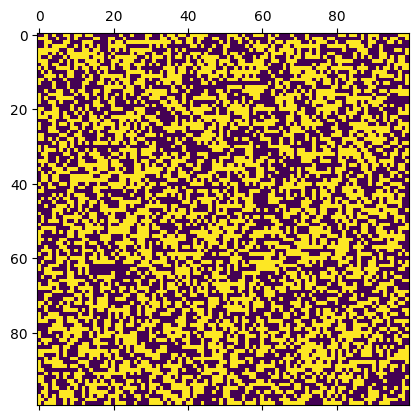

In [2]:
p = 0.5 # p can be between 0 and 1, this is the threshold where it becomes filled or not

arr_occu = 1*(arr_rand < p)
plt.matshow(arr_occu) # To show it

In [3]:
def percolation(N, p):
    raw_prob = np.random.random((N, N)) # gives a random number which would decide if it gets filled
    occupied = 1*(raw_prob < p)
    return occupied

Now, let's get it all together for percolation matrix of N = 100

In [116]:
# Generate the occupied and site matrix
N = 100
occup_matrix = percolation(N, 0.5) # generate a percolation matrix for N=100, and p=0.5
site = np.zeros((N, N)) # matrix where clusters are going to be labelled

Sites is where we are going to define the label.

In [117]:
def site_match(matrix, value, target, S): #S is the number of pixels per dimension
    for i in range(S):
        for j in range(S):
            if matrix[i, j] == value:
                matrix[i, j] = target
            return matrix


# Now, we're going to define the labels using Hoshen-Kopelman Algorithm:

# We scan for the first time, there might be points sharing a cluster that Python interperets otherwise
label_count = 1
for i in range(N): # We have defined N in 1
        for j in range(N):            
                # We filter out first the unoccupied states
                if occup_matrix[i, j] == 1: 
                    if i == 0 and j == 0: # At the very edge
                        site[i, j] = label_count
                        label_count += 1 # incremented before passing
                    # first row
                    elif i == 0 and occup_matrix[i, j-1] == 1: # at the left column
                        site[i, j] = site[i, j-1]
                    elif i == 0 and occup_matrix[i, j-1] == 0:
                        site[i, j] = label_count
                        label_count += 1
                    # first column
                    elif j == 0 and occup_matrix[i-1, j] == 1:
                        site[i, j] = site[i-1, j]
                    elif j == 0 and occup_matrix[i-1, j] == 0:
                        site[i, j] = label_count
                        label_count += 1
                        
                    # if top and left are not occupied
                    elif occup_matrix[i-1, j] == 0 and occup_matrix[i, j-1] == 0:
                        site[i, j] = label_count
                        label_count += 1
                    # else, we force the function to merge
                    elif occup_matrix[i-1, j] == 1 and occup_matrix[i, j-1] == 1:
                        site[i, j] = site[i-1, j]
                        if site[i-1, j] != site[i, j-1]:
                            site_match(site, site[i, j-1], site[i-1, j], N)
                    # else, if either of them are occupied
                    elif occup_matrix[i-1, j] == 0 and occup_matrix[i, j-1] == 1:
                        site[i, j] = site[i, j-1]
                    elif occup_matrix[i-1, j] == 1 and occup_matrix[i, j-1] == 0:
                        site[i, j] = site[i-1, j]
                    
                    pass
# Second pass, to ensure no one passes with an unwell matrix
# for i in range(N):
    # for j in range(N):
        # if site[i, j] != 0:
            # if site[i, j-1] != 0 and site[i-1, j] != 0:
                # site[i, j] = min(site[i, j-1], site[i-1, j])
                # site[i, j-1] = site[i, j]
                # site[i, j] = site[i-1, j]
                # site[i-1, j] = site[i, j-1]
            # elif site[i, j-1] != 0 and site[i-1, j] == 0:
                # site[i, j] = site[i, j-1]
                # site[i, j-1] = site[i, j]
            # elif site[i, j-1] == 0 and site[i-1, j] != 0:
                # site[i, j] = site[i-1, j]
                # site[i-1, j] = site[i, j]
            # else:
                # site[i, j] = site[i, j]
        # else:
            # pass               

In [118]:
site

array([[2.000e+00, 1.000e+00, 1.000e+00, ..., 2.500e+01, 2.500e+01,
        2.500e+01],
       [1.000e+00, 1.000e+00, 0.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [1.000e+00, 1.000e+00, 1.000e+00, ..., 0.000e+00, 5.600e+01,
        0.000e+00],
       ...,
       [0.000e+00, 1.190e+03, 0.000e+00, ..., 1.213e+03, 0.000e+00,
        0.000e+00],
       [1.236e+03, 0.000e+00, 1.237e+03, ..., 1.213e+03, 1.213e+03,
        0.000e+00],
       [1.236e+03, 0.000e+00, 1.237e+03, ..., 1.213e+03, 1.213e+03,
        1.213e+03]], shape=(100, 100))

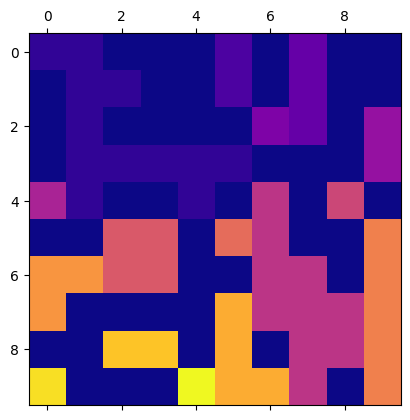

In [114]:
plt.matshow(site, cmap='plasma') # to ensure there's no confusing color

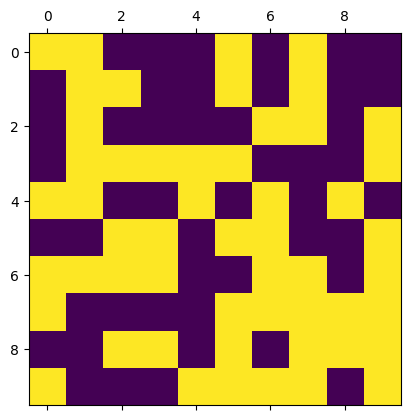

In [115]:
plt.matshow(occup_matrix)

Now, we'll ensure no number is skipped.

[[1.000e+00 1.000e+00 1.000e+00 ... 2.500e+01 2.500e+01 2.500e+01]
 [1.000e+00 1.000e+00 1.000e+00 ... 0.000e+00 0.000e+00 0.000e+00]
 [1.000e+00 1.000e+00 1.000e+00 ... 0.000e+00 5.600e+01 0.000e+00]
 ...
 [0.000e+00 1.190e+03 0.000e+00 ... 1.213e+03 0.000e+00 0.000e+00]
 [1.236e+03 0.000e+00 1.237e+03 ... 1.213e+03 1.213e+03 0.000e+00]
 [1.236e+03 0.000e+00 1.237e+03 ... 1.213e+03 1.213e+03 1.213e+03]]
The number of clusters: 1254
The probability of occupation: 0.5


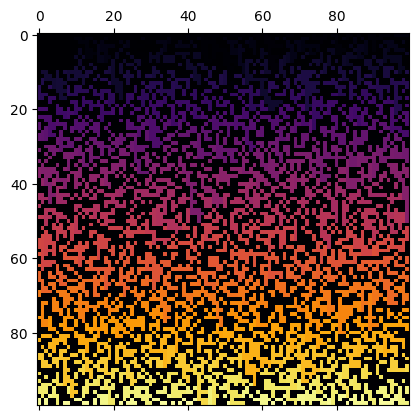

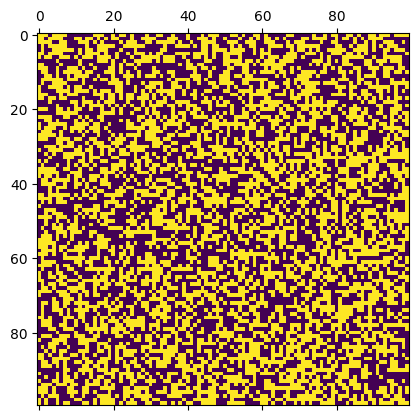

In [131]:
label_vals = []
label_vals_surjective = []
for i in range(N):
  for j in range(N):
    if site[i, j] != 0:
      count = 0
      for entry in label_vals:
        if site[i, j] == entry:
          count = 1
      if count == 0:
        label_vals.append(int(site[i, j]))

for i in range(len(label_vals)):
  label_vals_surjective.append(i+1)

for i in range(len(label_vals)):
  site_match(site, label_vals[i], label_vals_surjective[i], N)

# We'll show the new sites
print(site)
plt.matshow(site, cmap='inferno')
plt.savefig('sitemap.pdf')
plt.matshow(occup_matrix)
plt.savefig('occupation.pdf')
print("The number of clusters: " + str(len(label_vals)))
print("The probability of occupation: " + str(p))

One of the questions ask us the percolation probability, given the occupation probability. Now, it's time to check cluster spanning.

In [123]:
# Extracting critical rows and columns
top_row = []
bottom_row = []
left_column = []
right_column = []
for i in range(N):
    for j in range(N):
        
        if i == 0:
          top_row.append(int(site[i, j]))

        if j == 0:
          left_column.append(int(site[i, j]))

        if i == N-1:
          bottom_row.append(int(site[i, j]))

        if j == N-1:
          right_column.append(int(site[i, j]))

#Checking for a cluster that spans top to bottom
# Determine clusters present at the top row
round1 = []
for i in range(len(top_row)):
  if top_row[i] != 0:
      count = 0
      for entry in round1:
        if top_row[i] == entry:
          count = 1
      if count == 0: # append qualifiers if they're not a repetition of the existing
        round1.append(int(top_row[i]))

#Do they also exist on the bottommost row?
landers = []
for entry in round1:
  for key in bottom_row:
    #If they do, then it spans!
    if entry == key:
      count = 0
      for strike in landers: # for a round1 entry that got into bottom row
        if entry == strike:
          count = 1 # means no longer unique
      if count == 0:
        landers.append(entry)

for hit in landers:
  print("Cluster " + str(entry) + " spans the entire matrix from top to bottom.")

#Checking for a cluster that spans top to bottom
#What clusters are present in the leftmost column?
round1_left = []
for i in range(len(left_column)):
  if left_column[i] != 0:
      count = 0
      for entry in round1_left:
        if left_column[i] == entry:
          count = 1
      if count == 0:
        round1_left.append(int(left_column[i]))

#Do they also exist on the rightmost column?
hit_right = []
for entry in round1_left:
  for key in right_column:
    #If they do, then it spans!
    if entry == key:
      count = 0
      for strike in hit_right:
        if entry == strike:
          count = 1
      if count == 0:
        hit_right.append(entry)

for hit in hit_right:
  print("Cluster " + str(entry) + " spans the entire matrix from left to right.")

Now, we're ready to find the # of clusters vs. probability

## Clusters vs. Probability

We can just combine all the code to make the probability plot

In [124]:
def clustering(N, p):
    raw_prob = np.random.random((N, N)) # gives a random number which would decide if it gets filled
    occupied = 1*(raw_prob < p) # We now chug this in

    # Replace occup_matrix with occupied
    label_count = 1
    for i in range(N): # We have defined N in 1
        for j in range(N):            
                # We filter out first the unoccupied states
                if occupied[i, j] == 1: 
                    if i == 0 and j == 0: # At the very edge
                        site[i, j] = label_count
                        label_count += 1 # incremented before passing
                    # first row
                    elif i == 0 and occupied[i, j-1] == 1: # at the left column
                        site[i, j] = site[i, j-1]
                    elif i == 0 and occupied[i, j-1] == 0:
                        site[i, j] = label_count
                        label_count += 1
                    # first column
                    elif j == 0 and occupied[i-1, j] == 1:
                        site[i, j] = site[i-1, j]
                    elif j == 0 and occupied[i-1, j] == 0:
                        site[i, j] = label_count
                        label_count += 1
                        
                    # if top and left are not occupied
                    elif occupied[i-1, j] == 0 and occupied[i, j-1] == 0:
                        site[i, j] = label_count
                        label_count += 1
                    # else, we force the function to merge
                    elif occupied[i-1, j] == 1 and occupied[i, j-1] == 1:
                        site[i, j] = site[i-1, j]
                        if site[i-1, j] != site[i, j-1]:
                            site_match(site, site[i, j-1], site[i-1, j], N)
                    # else, if either of them are occupied
                    elif occupied[i-1, j] == 0 and occupied[i, j-1] == 1:
                        site[i, j] = site[i, j-1]
                    elif occupied[i-1, j] == 1 and occupied[i, j-1] == 0:
                        site[i, j] = site[i-1, j]
                    
                    pass
        
    # Surjectifying the values of sites
    label_vals = []
    label_vals_surjective = []
    for i in range(N):
      for j in range(N):
        if site[i, j] != 0:
          count = 0
          for entry in label_vals:
            if site[i, j] == entry:
              count = 1
          if count == 0:
            label_vals.append(int(site[i, j]))
    
    for i in range(len(label_vals)):
      label_vals_surjective.append(i+1)
    
    for i in range(len(label_vals)):
      site_match(site, label_vals[i], label_vals_surjective[i], N)
    
    # Extracting critical rows and columns
    top_row = []
    bottom_row = []
    left_column = []
    right_column = []
    for i in range(N):
        for j in range(N):
            
            if i == 0:
              top_row.append(int(site[i, j]))
    
            if j == 0:
              left_column.append(int(site[i, j]))
    
            if i == N-1:
              bottom_row.append(int(site[i, j]))
    
            if j == N-1:
              right_column.append(int(site[i, j]))
    
    #Checking for a cluster that spans top to bottom
    # Determine clusters present at the top row
    round1 = []
    for i in range(len(top_row)):
      if top_row[i] != 0:
          count = 0
          for entry in round1:
            if top_row[i] == entry:
              count = 1
          if count == 0: # append qualifiers if they're not a repetition of the existing
            round1.append(int(top_row[i]))
    
    #Do they also exist on the bottommost row?
    landers = []
    for entry in round1:
      for key in bottom_row:
        #If they do, then it spans!
        if entry == key:
          count = 0
          for strike in landers: # for a round1 entry that got into bottom row
            if entry == strike:
              count = 1 # means no longer unique
          if count == 0:
            landers.append(entry)
    #Checking for a cluster that spans top to bottom
    #What clusters are present in the leftmost column?
    round1_left = []
    for i in range(len(left_column)):
      if left_column[i] != 0:
          count = 0
          for entry in round1_left:
            if left_column[i] == entry:
              count = 1
          if count == 0:
            round1_left.append(int(left_column[i]))
    
    #Do they also exist on the rightmost column?
    hit_right = []
    for entry in round1_left:
      for key in right_column:
        #If they do, then it spans!
        if entry == key:
          count = 0
          for strike in hit_right:
            if entry == strike:
              count = 1
          if count == 0:
            hit_right.append(entry)
    return (len(label_vals))
             

[1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 9, 9, 9, 9, 9, 10, 10, 10, 10, 11, 11, 11, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 12, 12, 12, 14, 14, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 11, 11, 11, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13, 13, 13, 12, 12, 12, 12, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 14, 14, 14, 14, 14, 14, 13, 15, 15, 15, 14, 14, 16, 16, 16, 16, 16, 15, 15, 15, 15, 15, 15, 15, 15, 15, 17, 17, 17, 17, 17, 16, 16, 16, 16, 16, 16, 16, 16, 17, 16, 16, 16, 16, 16, 16, 15, 16, 16, 16, 16, 16, 17, 17, 18, 18, 18, 17, 17, 17, 17, 16, 15, 15, 17, 16, 16, 17, 16, 16, 20, 20, 18, 18, 17, 17, 18, 18, 17, 17, 17, 17, 15, 17, 19, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 16, 18, 18, 18, 18, 18, 18, 18, 17, 18, 17, 19, 19, 18, 

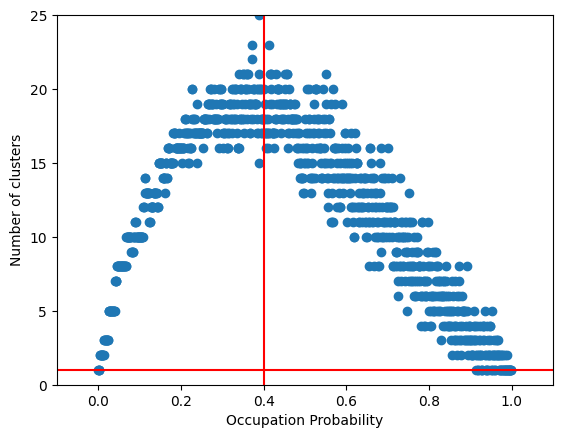

In [134]:
  
# Generate percolation matrices at different occupation probabilities
probability_space = np.arange(0,1,0.001) # We'll scatter 1000 pts.
results = []
for occupation_probability in probability_space:
    results.append(clustering(10, occupation_probability)) # Try N = 100 if there's sufficient time

# Plot using scatter
plt.scatter(probability_space, results)
plt.plot([-1,2],[1,1],color = 'red')
plt.plot([0.40, 0.40],[-1,25],color = 'red') # change depending on the peak
print(results)
plt.ylim(0,max(results))
plt.xlim(-0.1,1.1)
plt.xlabel("Occupation Probability")
plt.ylabel("Number of clusters")
plt.show()

Basically, the number of clusters has peaked around 0.4 of occupation probability. This is already based on different randomizations at different probabilities. this should remove any bias.